# The JSON Format

So far, we've learned how to use regular expressions to make cleaning and analyzing text data easier.

In this lesson, we'll learn some tips and syntax shortcuts we can use on top of everything we've learned, including:

- Creating list comprehensions to replace loops with a single line of code.
- Creating single use functions called lambda functions.

The data set we'll use in this lesson is in a format called Ja[vaScript Object Notation](https://www.json.org/) (JSON). As the name indicates, JSON originated from the JavaScript language, but has now become a language-independent format.

From a Python perspective, JSON can be thought of as a collection of Python objects nested inside each other.

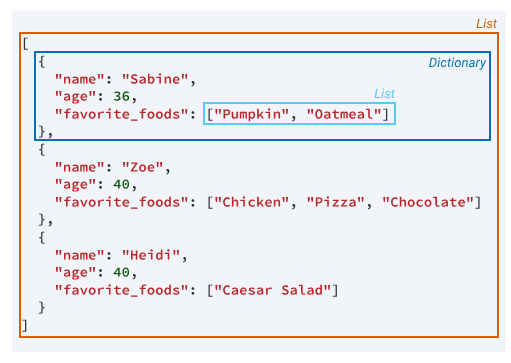

The JSON above is a list, where each element in the list is a dictionary. Each of the dictionaries have the same keys, and one of the values of each dictionary is itself a list.

The Python [json module](https://docs.python.org/3/library/json.html#module-json) contains a number of functions to make working with JSON objects easier. We can use the [json.loads() method](https://docs.python.org/3/library/json.html#json.loads) to convert JSON data contained in a string to the equivalent set of Python objects:

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot

In [2]:
json_string = """
[
  {
    "name": "Sabine",
    "age": 36,
    "favorite_foods": ["Pumpkin", "Oatmeal"]
  },
  {
    "name": "Zoe",
    "age": 40,
    "favorite_foods": ["Chicken", "Pizza", "Chocolate"]
  },
  {
    "name": "Heidi",
    "age": 40,
    "favorite_foods": ["Caesar Salad"]
  }
]
"""


In [3]:
json_obj = json.loads(json_string)
json_obj

[{'name': 'Sabine', 'age': 36, 'favorite_foods': ['Pumpkin', 'Oatmeal']},
 {'name': 'Zoe',
  'age': 40,
  'favorite_foods': ['Chicken', 'Pizza', 'Chocolate']},
 {'name': 'Heidi', 'age': 40, 'favorite_foods': ['Caesar Salad']}]

In [4]:
type(json_obj)

list

We can see that json_string has turned into a list. Let's take a look at the values in the list:

In [5]:
print(json_obj)

[{'name': 'Sabine', 'age': 36, 'favorite_foods': ['Pumpkin', 'Oatmeal']}, {'name': 'Zoe', 'age': 40, 'favorite_foods': ['Chicken', 'Pizza', 'Chocolate']}, {'name': 'Heidi', 'age': 40, 'favorite_foods': ['Caesar Salad']}]


We can observe a few things

- The formatting from our original string is gone. This is because printing Python lists and dictionaries has a simple formatting structure.
- The order of the keys in the dictionary may appear different. While Python dictionaries maintain insertion order in modern versions, the JSON specification does not guarantee key order preservation. This means that when working with JSON data, the order of keys might not always be consistent.

Let's practice using json.loads() to convert JSON data from a string to Python objects!

In [6]:
world_cup_str = """
[
    {
        "team_1": "France",
        "team_2": "Croatia",
        "game_type": "Final",
        "score" : [4, 2]
    },
    {
        "team_1": "Belgium",
        "team_2": "England",
        "game_type": "3rd/4th Playoff",
        "score" : [2, 0]
    }
]
"""

world_cup_obj = json.loads(world_cup_str)
world_cup_obj

[{'team_1': 'France',
  'team_2': 'Croatia',
  'game_type': 'Final',
  'score': [4, 2]},
 {'team_1': 'Belgium',
  'team_2': 'England',
  'game_type': '3rd/4th Playoff',
  'score': [2, 0]}]

## Reading a JSON file

One of the places where the JSON format is commonly used is in the results returned by an [Application programming interface](https://en.wikipedia.org/wiki/API) (API). APIs are interfaces that can be used to send and transmit data between different computer systems. We'll learn about how to work with APIs in a later course.

The data set from this lesson —`hn_2014.json` — was downloaded from the Hacker News API. It's a different set of data from the CSV we've been using in the previous two lessons, and it contains data about stories from Hacker News in 2014.

To read a file from JSON format, we use the [json.load() function](https://docs.python.org/3/library/json.html#json.load). Note that the function is json.load() without an "s" at the end. The json.loads() function is used for loading JSON data from a string ("loads" is short for "load string"), whereas the json.load() function is used to load from a file object. Let's look at how we would read that in our data:

Note that we're using with to open the file, which is a better practice than just using open(). You can read more about with [here](https://builtin.com/software-engineering-perspectives/what-is-with-statement-python).

In [7]:
with open("../../Datasets/hn_2014.json") as file:
    hn = json.load(file)
print(type(hn))

<class 'list'>


Our hn variable is a list. Let's find out how many objects are in the list, and the type of the first object (which will almost always be the type of every object in the list in JSON data):

In [8]:
print(len(hn))
print(type(hn[0]))

35806
<class 'dict'>


Our data set contains 35,806 dictionary objects, each representing a Hacker News story. In order to understand the format of our data set, we'll print the keys of the first dictionary:

In [9]:
print(hn[0].keys())

dict_keys(['author', 'numComments', 'points', 'url', 'storyText', 'createdAt', 'tags', 'createdAtI', 'title', 'objectId'])


If we recall the data set we used in the previous two lessons, we can see some similarities. There are keys representing the title, URL, points, number of comments, and date, as well as some others that are less familiar to us. Here is a summary of the keys and the data that they contain:

- : The username of the person who submitted the story.
- createdAt: The date and time at which the story was created.
- createdAtI: An integer value representing the date and time at which the story was created.
- numComments: The number of comments that were made on the story.
- objectId: The unique identifier from Hacker News for the story.
- points: The number of points the story acquired, calculated as the total number of upvotes minus the total number of downvotes.
- storyText: The text of the story (if the story contains text).
- tags: A list of tags associated with the story.
- title: The title of the story.
- url: The URL that the story links to (if the story links to a URL).

## Deleting Dictionary Keys

Let's look at the first dictionary in full. To make it easier to understand, we're going to create a function which will print a JSON object with formatting to make it easier to read.

The function will use the [json.dumps() function](https://docs.python.org/3/library/json.html#json.dumps) ("dump string") which does the opposite of the json.loads() function — it takes a JSON object and returns a string version of it. The json.dumps() function accepts arguments that can specify formatting for the string, which we'll use to make things easier to read:

In [10]:
json.loads(""" {
    "author": "dragongraphics",
    "createdAt": "2014-05-29T08:07:50Z",
    "createdAtI": 1401350870,
    "numComments": 0,
    "objectId": "7815238",
    "points": 2,
    "storyText": "",
    "tags": [
        "story",
        "author_dragongraphics",
        "story_7815238"
    ],
    "title": "Are we getting too Sassy? Weighing up micro-optimisation vs. maintainability",
    "url": "http://ashleynolan.co.uk/blog/are-we-getting-too-sassy"
}""")

{'author': 'dragongraphics',
 'createdAt': '2014-05-29T08:07:50Z',
 'createdAtI': 1401350870,
 'numComments': 0,
 'objectId': '7815238',
 'points': 2,
 'storyText': '',
 'tags': ['story', 'author_dragongraphics', 'story_7815238'],
 'title': 'Are we getting too Sassy? Weighing up micro-optimisation vs. maintainability',
 'url': 'http://ashleynolan.co.uk/blog/are-we-getting-too-sassy'}

In [11]:
def jprint(obj):
    # create a formatte string of the Python JSON object

    text = json.dumps(obj, sort_keys=True, indent=4)
    print(type(text))
    print(text)

first_story = hn[0]
type(jprint(first_story))

<class 'str'>
{
    "author": "dragongraphics",
    "createdAt": "2014-05-29T08:07:50Z",
    "createdAtI": 1401350870,
    "numComments": 0,
    "objectId": "7815238",
    "points": 2,
    "storyText": "",
    "tags": [
        "story",
        "author_dragongraphics",
        "story_7815238"
    ],
    "title": "Are we getting too Sassy? Weighing up micro-optimisation vs. maintainability",
    "url": "http://ashleynolan.co.uk/blog/are-we-getting-too-sassy"
}


NoneType

In [12]:
# pd.read_json('../../Datasets/hn_2014.json') - reads json file as a dataframe

In [13]:
type(hn[0])

dict

In [14]:
def jprint(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

first_story = hn[0]
jprint(first_story)

{
    "author": "dragongraphics",
    "createdAt": "2014-05-29T08:07:50Z",
    "createdAtI": 1401350870,
    "numComments": 0,
    "objectId": "7815238",
    "points": 2,
    "storyText": "",
    "tags": [
        "story",
        "author_dragongraphics",
        "story_7815238"
    ],
    "title": "Are we getting too Sassy? Weighing up micro-optimisation vs. maintainability",
    "url": "http://ashleynolan.co.uk/blog/are-we-getting-too-sassy"
}


You may notice that the `createdAt` and `createdAtI` keys both have the date and time data in two different formats. Because the format of `createdAt` is much easier to understand, let's do some data cleaning by deleting the `createdAtI` key from every dictionary.

In [15]:
x = {'a': 2, "b":3, "c": 5}

In [16]:
x.pop("d", "Not found")

'Not found'

In [17]:
del x['a']

In [18]:
x

{'b': 3, 'c': 5}

In [19]:
# for item in hn:
#     del item['createdAtI']

In [20]:
# hn[0].pop('createdAtI', 'Not found')

To delete a key from a dictionary, we can use the [del statement](https://docs.python.org/3/reference/simple_stmts.html#the-del-statement). Let's learn the syntax by looking at a simple example: 

In [21]:
d = {'a': 1, 'b': 2, 'c': 3}
del d['a']
print(d)

{'b': 2, 'c': 3}


We can create a function using del that will return a copy of our dictionary with the key removed:

In [22]:
def del_key(dict_, key):
    # create a copy so we don't
    # modify the original dict
    modified_dict = dict_.copy()
    del modified_dict[key]
    return modified_dict

Let's use this function to delete the createdAtI key from first_story:

In [23]:
first_story

{'author': 'dragongraphics',
 'numComments': 0,
 'points': 2,
 'url': 'http://ashleynolan.co.uk/blog/are-we-getting-too-sassy',
 'storyText': '',
 'createdAt': '2014-05-29T08:07:50Z',
 'tags': ['story', 'author_dragongraphics', 'story_7815238'],
 'createdAtI': 1401350870,
 'title': 'Are we getting too Sassy? Weighing up micro-optimisation vs. maintainability',
 'objectId': '7815238'}

In [25]:
first_story = del_key(first_story, 'createdAtI')
jprint(first_story)

{
    "author": "dragongraphics",
    "createdAt": "2014-05-29T08:07:50Z",
    "numComments": 0,
    "objectId": "7815238",
    "points": 2,
    "storyText": "",
    "tags": [
        "story",
        "author_dragongraphics",
        "story_7815238"
    ],
    "title": "Are we getting too Sassy? Weighing up micro-optimisation vs. maintainability",
    "url": "http://ashleynolan.co.uk/blog/are-we-getting-too-sassy"
}


The dictionary returned by the function no longer includes the createdAtI key.

Let's use a loop and the del_key() function to remove the createdAtI key from every story in our Hacker News data set:

In [28]:
def del_key(dict_, key):
    # create a copy so we don't
    # modify the original dict
    modified_dict = dict_.copy()
    del modified_dict[key]
    return modified_dict
hn_clean = []
for dict_ in hn:
    new_d = del_key(dict_, "createdAtI")
    hn_clean.append(new_d)

## Writing List Comprehensions

Here is the solution code from the previous screen:

In [29]:
hn_clean = []

for d in hn:
    new_d = del_key(d, 'createdAtI')
    hn_clean.append(new_d)

The task we performed is an extremely common one. Specifically, we:

- Iterated over values in a list.
- Performed a transformation on those values.
- Assigned the result to a new list.

Python includes a special syntax shortcut for tasks that meet these criteria: List Comprehensions. A list comprehension provides a concise way of creating lists in a single line of code.

List comprehensions can look complex at first, but we are simply reordering the elements of our for loop code. To keep things simple, we'll start with a basic example, where we want to add 1 to each item in a list of integers.

In [30]:
ints = [1, 2, 3, 4]

plus_one = []
for i in ints:
    plus_one.append(i + 1)

print(plus_one)

[2, 3, 4, 5]


Let's start by labeling the three main parts of our loop:

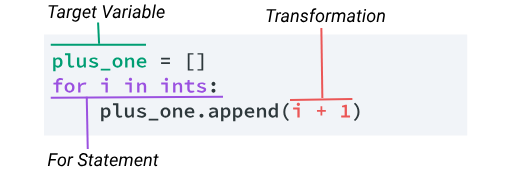

To transform this structure into a list comprehension, we do the following within brackets:

- Start with the code that transforms each item.
- Continue with our for statement (without a colon).

We can then assign the list comprehension to a variable name. The animation below shows how we convert the manual loop version to a list comprehension.

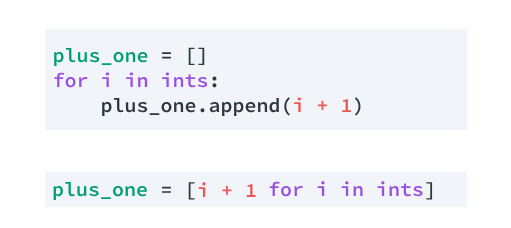

Let's look at a second example, where we want to multiply each item in the list by 10:

In [31]:
times_ten = []
for i in ints:
    times_ten.append(i * 10)

print(times_ten)

[10, 20, 30, 40]


To convert this to a list comprehension, we follow the same pattern:

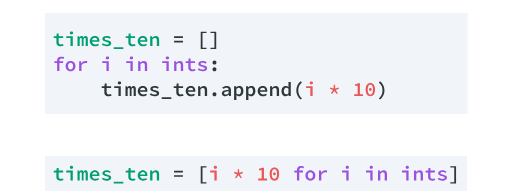

The "transformation" step of our list comprehension can be anything, including a function or method. In the example below, we are applying a function to a list of floats to round them to integers:

In [32]:
floats = [2.1, 8.7, 4.2, 8.9]

rounded = []
for f in floats:
    rounded.append(round(f))

print(rounded)

[2, 9, 4, 9]


To convert to a list comprehension, we simply rearrange the components:

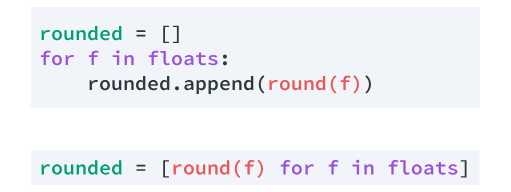

Just like in a normal loop, we can use any name for our iterator variable. Here, we have used f.

For the last example, we'll apply a method to each string in a list to capitalize it. We won't color the different components, so we can get used to how that looks.

In [33]:
letters = ['a', 'b', 'c', 'd']

caps = []
for l in letters:
    caps.append(l.upper())

Even though we've used a different kind of transformation, the ordering of the list comprehension remains the same:

In [34]:
caps = [l.upper() for l in letters]
print(caps)

['A', 'B', 'C', 'D']


Let's recap what we have learned so far. A list comprehension can be used where we:

- Iterated over values in a list.
- Performed a transformation on those values.
- Assigned the result to a new list.

To transform a loop to a list comprehension, in brackets we:

- Start with the code that transforms each item.
- Continue with our for statement (without a colon).

We are going to write a list comprehension version of the code from the previous screen. To help, we've provided a copy of the code with the components labeled.

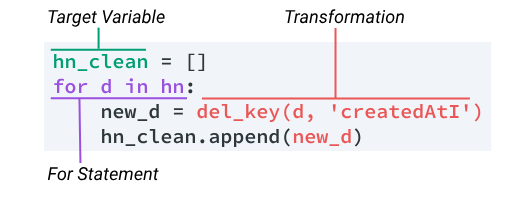

In [35]:
hn_clean = [del_key(dict_, "createdAtI") for dict_ in hn]

## Using List Comprehensions to Transform and Create Lists

List comprehensions can be used for many different things. Three common applications are:

1. Transforming a list
2. Creating a new list
3. Reducing a list

On this screen, we're going to look at the first two of these applications.

The first application, transforming a list, is the category that all the examples you've seen so far fit under. You are taking an existing list, applying a transformation to every value, and assigning it to a variable.

The example below uses a list comprehension to transform a list of square numbers into their "square roots":

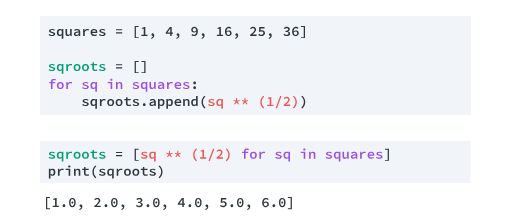

The second application, creating a new list, is useful for creating test data or data that is based on a set of numbers.

As an example, let's create a list of generic columns names that we could use to create a dataframe using the [range() function](https://docs.python.org/3/library/stdtypes.html#range) and [f-strings](https://docs.python.org/3/tutorial/inputoutput.html#tut-f-strings) to combine numbers and text:

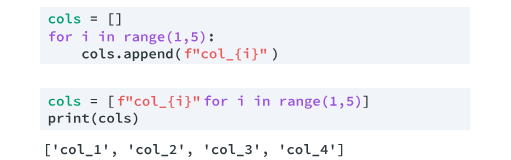

We can then use this to create an empty dataframe with labels:

In [36]:
cols = [f"col_{i}" for i in range(1,5)]
data = np.zeros((4,4))

df = pd.DataFrame(data, columns=cols)
print(df)

   col_1  col_2  col_3  col_4
0    0.0    0.0    0.0    0.0
1    0.0    0.0    0.0    0.0
2    0.0    0.0    0.0    0.0
3    0.0    0.0    0.0    0.0


Let's use list comprehension to create a new list containing just the URLs from each story.

In [38]:
urls = [d['url'] for d in hn]

In [39]:
urls[:10]

['http://ashleynolan.co.uk/blog/are-we-getting-too-sassy',
 'http://spectrum.ieee.org/automaton/robotics/home-robots/telemba-telepresence-robot',
 'http://online.wsj.com/articles/apple-to-buy-beats-1401308971',
 'http://alexsblog.org/2014/05/29/dont-wait-for-inspiration/',
 'http://techcrunch.com/2014/05/28/hackerone-get-9m-in-series-a-funding-to-build-bug-tracking-bounty-programs/',
 'http://www.teslamotors.com/en_AU/models/design',
 'http://gearapp.challengepost.com/',
 'https://gigaom.com/2014/05/28/skype-will-soon-get-real-time-speech-translation-based-on-deep-learning/',
 'http://www.nbcnews.com/feature/edward-snowden-interview/watch-primetime-special-inside-mind-edward-snowden-n117126',
 'http://snippetrepo.com/snippets/linear-equation-solver-in-3-lines-of-python']

## Using List Comprehensions to Reduce a List

The last common application of list comprehensions is reducing a list. Let's say we had a list of integers and we wanted to remove any integers that were smaller than 50. We could do this by adding an if statement to our loop:

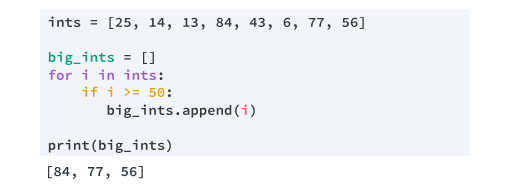

Our loop has one new component — the if statement, which we've colored yellow. Notice that instead of a transformation, we have just the list item itself (i) in red. Both if statements and transformations are optional in list comprehensions, but we must include some value to populate the elements in the new list.

To include an if statement in a list comprehension, we include it at the very end, before the closing bracket:

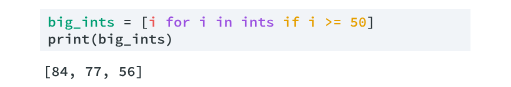

We can use this technique to quickly and easily filter our data set using an if statement. Let's look at how we could use this to quickly count the number of stories that have comments. We'll start with a version using a loop:

In [40]:
has_comments = []

for d in hn_clean:
    if d['numComments'] > 0:
        has_comments.append(d)

num_comments = len(has_comments)
print(num_comments)

9279


Now, let's use a list comprehension to perform the same calculation:

In [41]:
has_comments = [d for d in hn_clean if d['numComments'] > 0]

num_comments = len(has_comments)
print(num_comments)

9279


Let's use list comprehension to count how many stories have more than 1,000 points.

In [43]:
hn[0]

{'author': 'dragongraphics',
 'numComments': 0,
 'points': 2,
 'url': 'http://ashleynolan.co.uk/blog/are-we-getting-too-sassy',
 'storyText': '',
 'createdAt': '2014-05-29T08:07:50Z',
 'tags': ['story', 'author_dragongraphics', 'story_7815238'],
 'createdAtI': 1401350870,
 'title': 'Are we getting too Sassy? Weighing up micro-optimisation vs. maintainability',
 'objectId': '7815238'}

In [47]:
thousand_points = [d for d in hn_clean if d['points'] > 1000]
num_thousand_points = len(thousand_points)
num_thousand_points

8

## Passing Functions as Arguments

In previous lessons, we learned to use Python's built-in functions to analyze data in lists, like min(), max(), and sorted().

What if we wanted to use these functions to work with data in JSON form? Let's use our demo JSON object to try and see what happens. First, we'll quickly remind ourselves of the data:

In [48]:
jprint(json_obj)

[
    {
        "age": 36,
        "favorite_foods": [
            "Pumpkin",
            "Oatmeal"
        ],
        "name": "Sabine"
    },
    {
        "age": 40,
        "favorite_foods": [
            "Chicken",
            "Pizza",
            "Chocolate"
        ],
        "name": "Zoe"
    },
    {
        "age": 40,
        "favorite_foods": [
            "Caesar Salad"
        ],
        "name": "Heidi"
    }
]


Let's try and use Python to return the dictionary of the person with the lowest age:

In [54]:
sorted(json_obj, key=lambda x: x['age'])

[{'name': 'Sabine', 'age': 36, 'favorite_foods': ['Pumpkin', 'Oatmeal']},
 {'name': 'Zoe',
  'age': 40,
  'favorite_foods': ['Chicken', 'Pizza', 'Chocolate']},
 {'name': 'Heidi', 'age': 40, 'favorite_foods': ['Caesar Salad']}]

In [55]:
min(json_obj, key=lambda x: x['age'])

{'name': 'Sabine', 'age': 36, 'favorite_foods': ['Pumpkin', 'Oatmeal']}

In [56]:
max(json_obj, key=lambda x: x['age'])

{'name': 'Zoe', 'age': 40, 'favorite_foods': ['Chicken', 'Pizza', 'Chocolate']}

Let's try and use Python to return the dictionary of the person with the lowest age:

In [57]:
min(json_obj)

TypeError: '<' not supported between instances of 'dict' and 'dict'

We get an error because Python doesn't have any way to tell whether one dictionary object is "greater" than another.

There is a way we can actually tell functions like min(), max(), and sorted() how to sort complex objects like dictionaries and lists of lists. We do this by using the optional key argument. The official Python documentation contains the following excerpt that describes how the argument works:

> key specifies a function of one argument that is used to extract a comparison key from each list element. The key corresponding to each item in the list is calculated once and then used for the entire sorting process.

This excerpt tells us we need to specify a function as an argument to control the comparison between values. Up until now, we've only passed variables or values as arguments, but not functions!

We'll learn the specifics of this particular application in a moment, but for now, we're going to explore how to pass a function as an argument.

Let's define a very simple function as an example:

In [58]:
def greet():
    return "hello"

If we try to examine the type of our function, we are unsuccessful:

In [59]:
t = type(greet())
print(t)

<class 'str'>


What happens is that greet() is executed first; it returns the string "hello", and then the type() function tells us the type of that string:

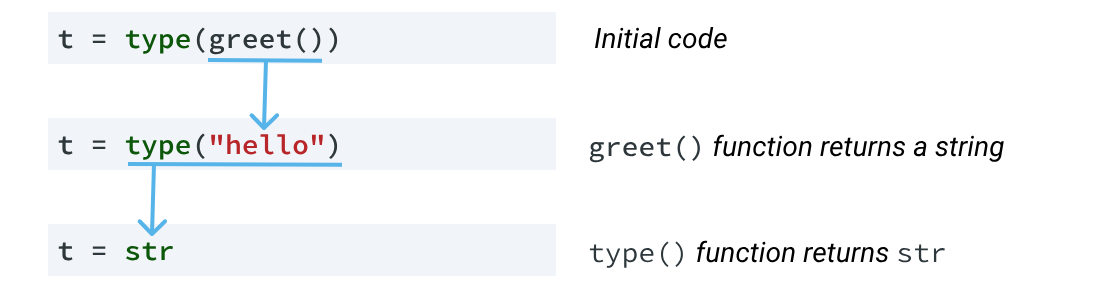

We need to find a way to look at the function itself, rather than the result of the function. The key to this is the parentheses: ().

The parentheses are what tells Python to execute the function, so if we omit the parentheses we can treat a function like a variable, rather than working with the output of the function:

In [60]:
t = type(greet)
print(t)

<class 'function'>


There are other variable-like behaviors we can also use when we omit the parentheses from a function. For instance, we can assign a function to a new variable name:

In [61]:
greet_2 = greet

greet_2()

'hello'

Now that we understand how to treat a function as variable, let's look at how we can run a function inside another function by passing it as an argument:

In [63]:
def run_func(func):
    print(f"RUNNING FUNCTION: {func}")
    return func()


run_func(greet)

RUNNING FUNCTION: <function greet at 0x0000022233870B80>


'hello'

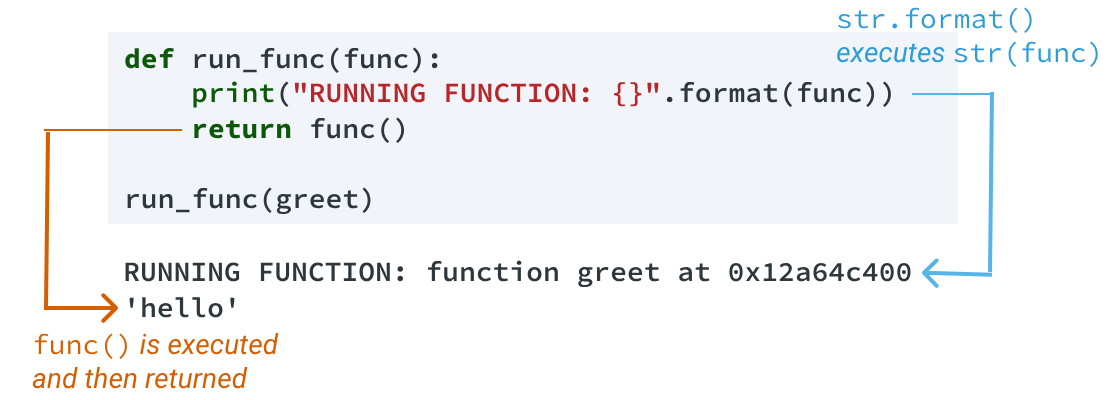

Now that we have some intuition on how to pass functions as arguments, let's see how we use a function to control the behavior of the sorted() function:

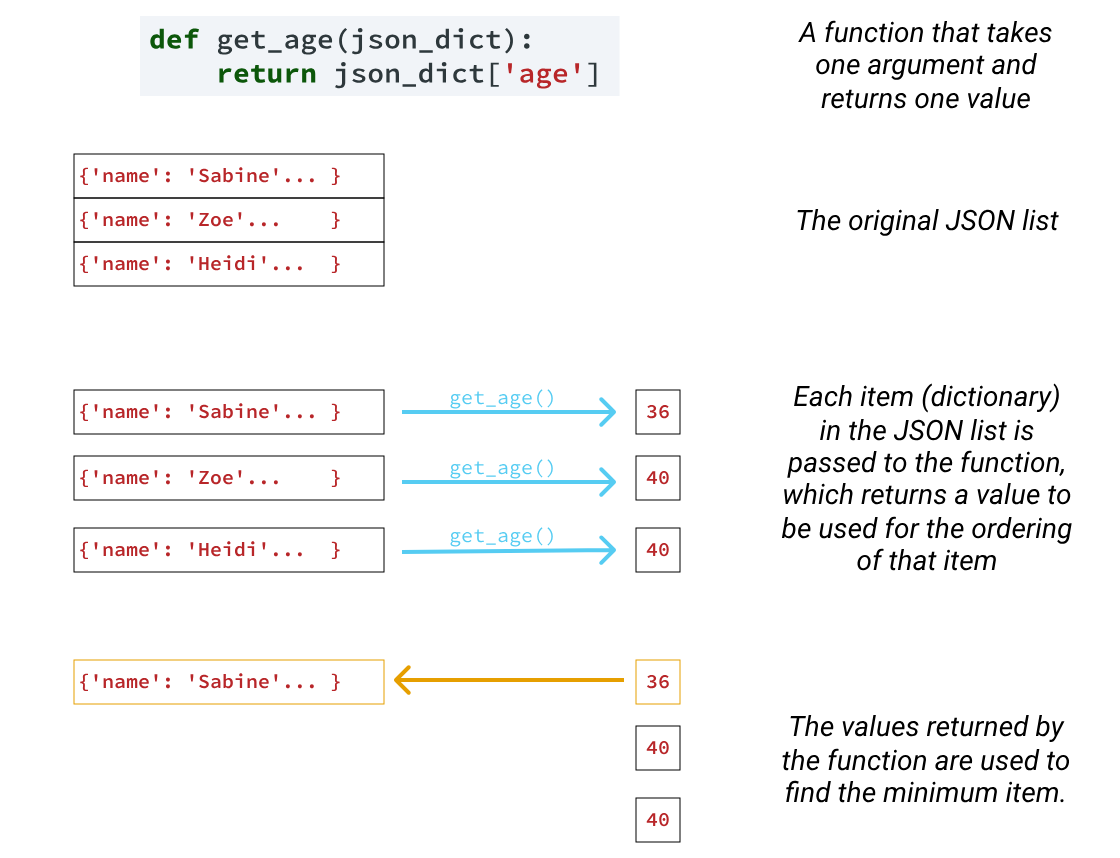

Let's look at the same thing in code form:

In [65]:
def get_age(json_dict):
    return json_dict['age']


youngest = min(json_obj, key=get_age)
jprint(youngest)

{
    "age": 36,
    "favorite_foods": [
        "Pumpkin",
        "Oatmeal"
    ],
    "name": "Sabine"
}


Let's use this technique to find the story that has the greatest number of comments.

In [68]:
def get_num_comments(json_dict):
    return json_dict['numComments']

most_comments = max(hn_clean, key=get_num_comments)
most_comments

{'author': 'platz',
 'numComments': 1208,
 'points': 889,
 'url': 'https://blog.mozilla.org/blog/2014/04/03/brendan-eich-steps-down-as-mozilla-ceo/',
 'storyText': None,
 'createdAt': '2014-04-03T19:02:53Z',
 'tags': ['story', 'author_platz', 'story_7525198'],
 'title': 'Brendan Eich Steps Down as Mozilla CEO',
 'objectId': '7525198'}

In [69]:
def get_num_comments(story):
    return story['numComments']

most_comments = max(hn_clean, key=get_num_comments)
most_comments

{'author': 'platz',
 'numComments': 1208,
 'points': 889,
 'url': 'https://blog.mozilla.org/blog/2014/04/03/brendan-eich-steps-down-as-mozilla-ceo/',
 'storyText': None,
 'createdAt': '2014-04-03T19:02:53Z',
 'tags': ['story', 'author_platz', 'story_7525198'],
 'title': 'Brendan Eich Steps Down as Mozilla CEO',
 'objectId': '7525198'}

## Lambda Functions

Usually, we create functions when we want to perform the same task many times. In the previous exercise, we created a function to use just once — as an argument to max().

Python provides a special syntax to create temporary functions for situations like these. These functions are called lambda functions. Lambda functions can be defined in a single line, which allows you to define a function you want to pass as an argument at the time you need it.

While it's uncommon to assign a lambda function to a variable name in practice, we'll do that here to help illustrate how lambda functions work through some simple examples. We'll start with a function that returns a single argument without modifying it:

In [70]:
def unchanged(x):
    return x

Let's give each component of the function a name so we can more easily talk about it:

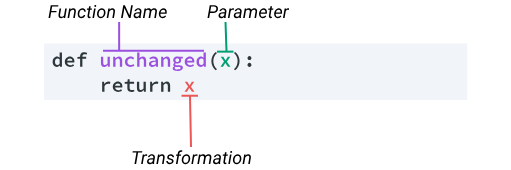

We're calling the returned element "transformation," even though there is no transformation. This will make sense as we introduce more complex examples.

To create a lambda function equivalent of this function, we:

- Use the lambda keyword, followed by
- The parameter and a colon, and then
- The transformation we wish to perform on our argument

We can then assign that to the function name:

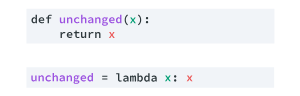

Let's look at a comparison of the original function and its lamdba equivalent:

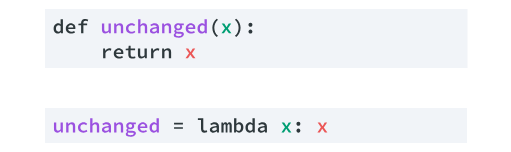

Now let's look at a second example, where we add a simple transformation to the argument:

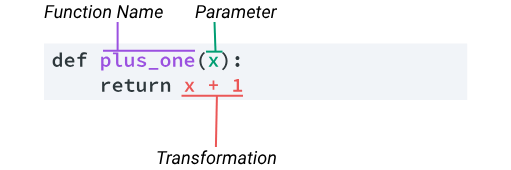

We follow exactly the same steps to make a lambda function:

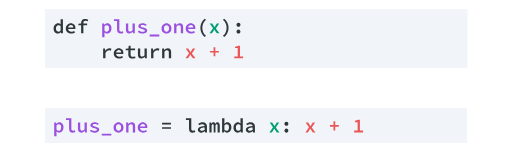

If we want to create a lambda that has multiple parameters, we follow exactly the same steps:

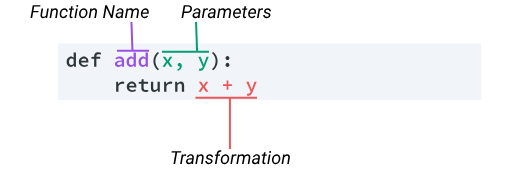

Where we have multiple parameters, they transfer in the same format to where a single parameter would exist in our lambda function:

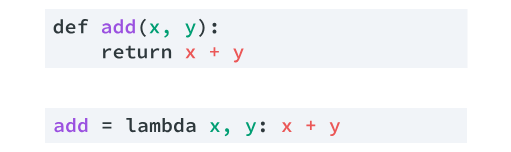

If a function is particularly complex, it may be a better choice to define a regular function rather than create a lambda, even if it will only be used once. For instance, this function below, which extracts digits from a string and then adds one to the resultant integer:

In [71]:
def extract_and_increment(string):
    digits = re.search(r"\d+", string).group()
    incremented = int(digits) + 1
    return incremented

It becomes tough to understand in its lambda form:

In [72]:
extract_and_increment = lambda string: int(re.search(r"\d+", string).group()) + 1

Being mindful of this will ensure our code remains easy to read and understand. In general, it's a good practice to use regular functions for more complex operations and reserve lambda functions for simple, one-line operations.

Let's practice creating a lambda function version of a simple function:

In [73]:
# def multiply(a, b):
#    return a * b

multiply = lambda a, b: a*b

## Using Lambda Functions to Analyze JSON data

As we mentioned briefly on the previous screen, assigning a lambda to a variable so it can be called by name is a pretty uncommon pattern. The primary use of lambda functions is to define a function in place, like when we are providing a function as an argument.

So we have a more precise understanding of how a lambda function works, let's look at how our solution from the previous screen is executed:

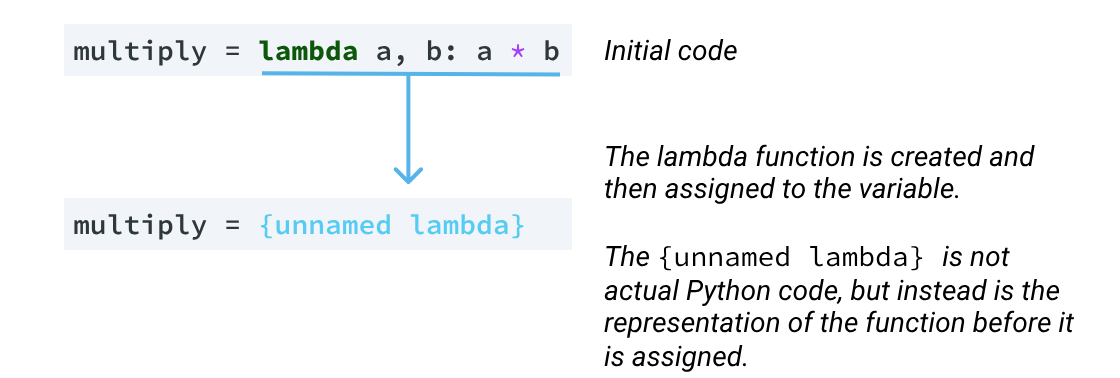

Let's look at how this works in common usage with min(), max(), and sorted(). We'll use the JSON object from the previous few screens so it's easier to observe what is happening:

In [74]:
jprint(json_obj)

[
    {
        "age": 36,
        "favorite_foods": [
            "Pumpkin",
            "Oatmeal"
        ],
        "name": "Sabine"
    },
    {
        "age": 40,
        "favorite_foods": [
            "Chicken",
            "Pizza",
            "Chocolate"
        ],
        "name": "Zoe"
    },
    {
        "age": 40,
        "favorite_foods": [
            "Caesar Salad"
        ],
        "name": "Heidi"
    }
]


Let's start by using a lambda function with sorted() to sort the items in our JSON list alphabetically by name:

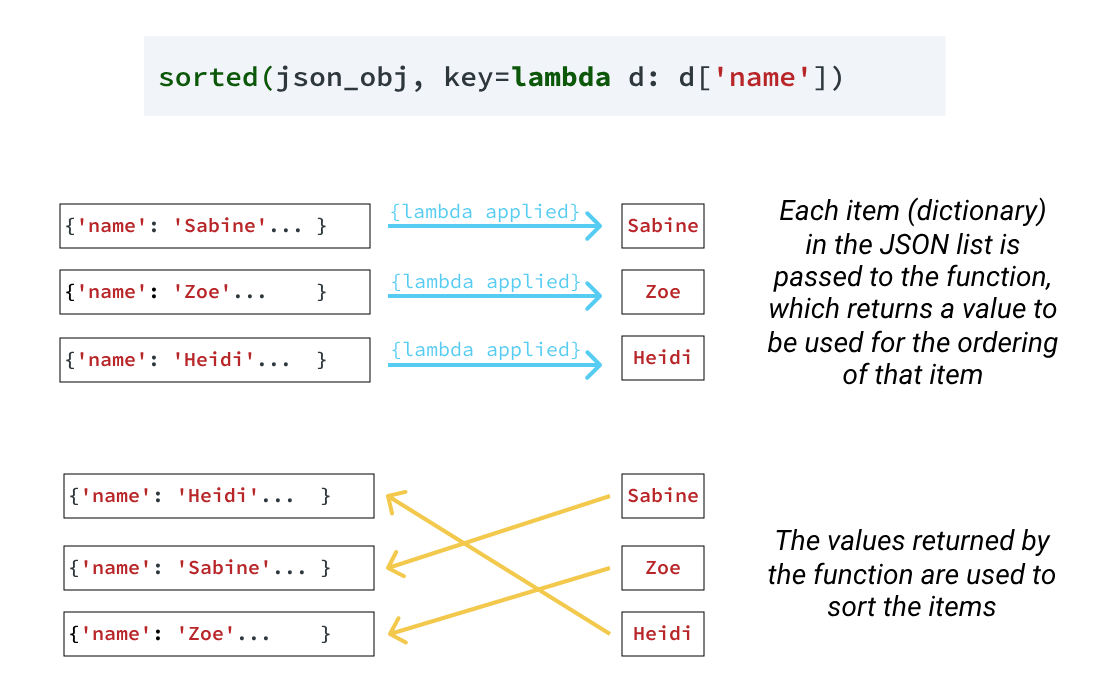

Next, we'll use a lambda function with min() to calculate the item in our JSON list with the smallest age:

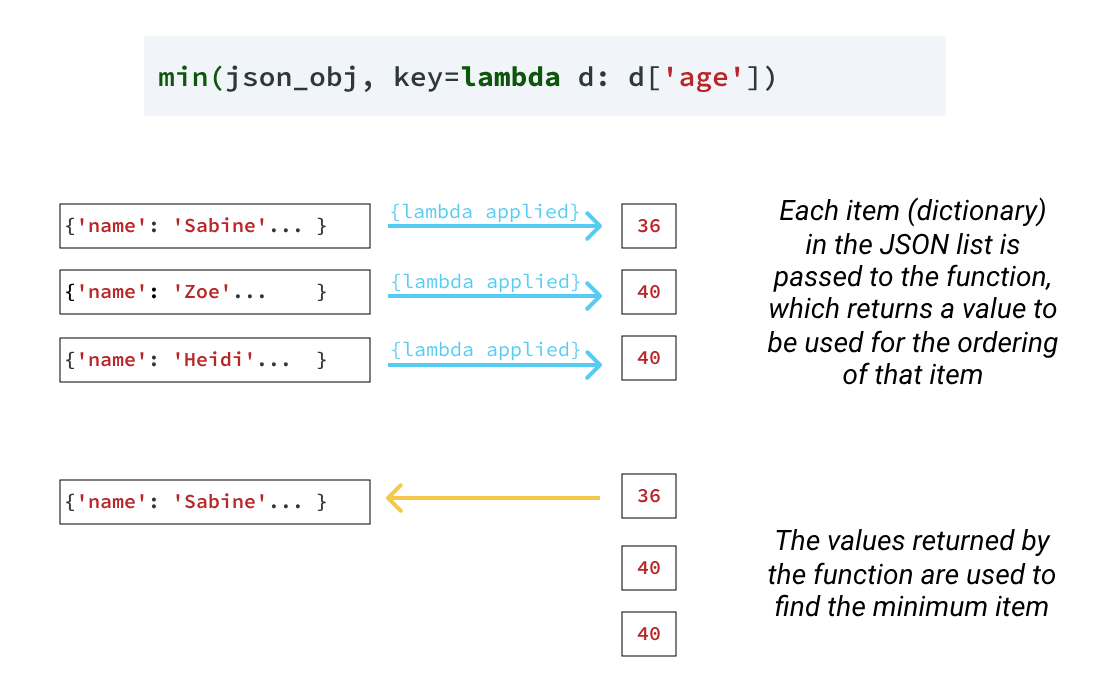

Lastly, we'll use a lambda function with max() to calculate the item in our JSON list with the largest number of favorite foods:

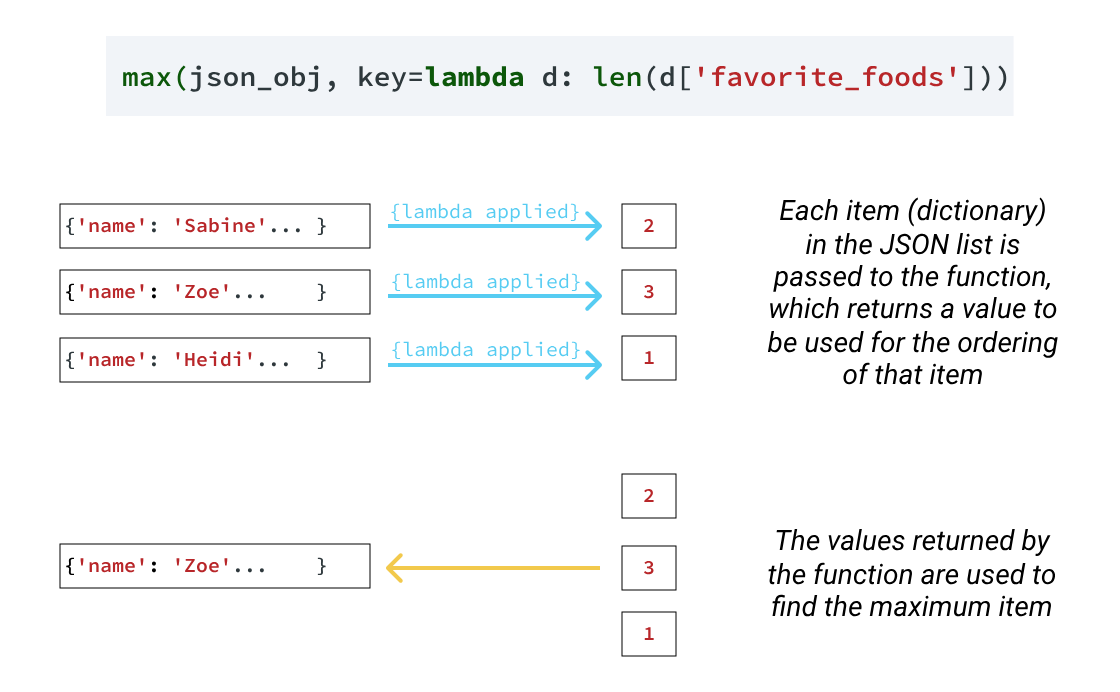

Over the past three screens, we have:

- Learned that functions can be passed as arguments.
- Created functions and used them to calculate the minimum, maximum, and to sort lists of lists.
- Learned about lambda functions and how to create them.
- Learned how to use a lambda function to pass an argument in place when calculating minimums, maximums, and sorting lists of lists.

We can now apply all of this new knowledge to our Hacker News data to calculate the posts that had the most points in 2014!

In [80]:
hn_sorted_points = sorted(hn_clean, key=lambda story: story['points'], reverse=True)

In [81]:
hn_sorted_points[0]

{'author': 'frederfred',
 'numComments': 398,
 'points': 2732,
 'url': 'http://gabrielecirulli.github.io/2048/',
 'storyText': '',
 'createdAt': '2014-03-10T15:44:42Z',
 'tags': ['story', 'author_frederfred', 'story_7373566'],
 'title': '2048',
 'objectId': '7373566'}

## Reading JSON files into pandas

So far, we've worked with our JSON data using pure Python. One other option available to us is to convert the JSON to a pandas dataframe and then use pandas methods to manipulate it.

Pandas has the [pd.read_json() function](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html), which is designed to read JSON from either a file or a JSON string. In our case, our JSON exists as Python objects already, so we don't need to use this function.

Because the structure of JSON objects can vary a lot, sometimes you will need to prepare your data in order to be able to convert it to a tabular form. In our case, our data is a list of dictionaries, which pandas is easily able to convert to a dataframe.

Let's look at our JSON example again:

In [82]:
jprint(json_obj)

[
    {
        "age": 36,
        "favorite_foods": [
            "Pumpkin",
            "Oatmeal"
        ],
        "name": "Sabine"
    },
    {
        "age": 40,
        "favorite_foods": [
            "Chicken",
            "Pizza",
            "Chocolate"
        ],
        "name": "Zoe"
    },
    {
        "age": 40,
        "favorite_foods": [
            "Caesar Salad"
        ],
        "name": "Heidi"
    }
]


Each of the dictionaries will become a row in the dataframe, with each key corresponding to a column name.

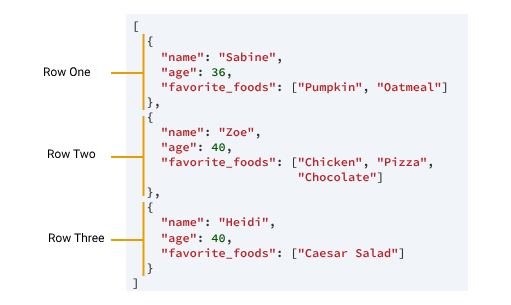

We can use the [pd.DataFrame() constructor](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame) and pass the list of dictionaries directly to it to convert the JSON to a dataframe:

In [83]:
json_df = pd.DataFrame(json_obj)
print(json_df)

     name  age               favorite_foods
0  Sabine   36           [Pumpkin, Oatmeal]
1     Zoe   40  [Chicken, Pizza, Chocolate]
2   Heidi   40               [Caesar Salad]


In this case, the favorite_foods column contains the list from the JSON. We'll see a similar thing with the tags column for our Hacker News data. We'll learn how to correct that on the next screen, but for now, let's convert our data to a pandas dataframe.

 screen, but for now, let's convert our data to a pandas dataframe.

In [87]:
hn_df = pd.DataFrame(hn_clean)
hn_df.head(3)

,author,numComments,points,url,storyText,createdAt,tags,title,objectId
0,dragongraphics,0,2,http://ashleynolan.co.uk/blog/are-we-getting-t...,,2014-05-29T08:07:50Z,"[story, author_dragongraphics, story_7815238]",Are we getting too Sassy? Weighing up micro-op...,7815238
1,jcr,0,1,http://spectrum.ieee.org/automaton/robotics/ho...,,2014-05-29T08:05:58Z,"[story, author_jcr, story_7815234]",Telemba Turns Your Old Roomba and Tablet Into ...,7815234
2,callum85,0,1,http://online.wsj.com/articles/apple-to-buy-be...,,2014-05-29T08:05:06Z,"[story, author_callum85, story_7815230]",Apple Agrees to Buy Beats for $3 Billion,7815230


## Exploring Tags Using the Apply Function

Let's look at the first few rows of our new hn_df dataframe:

In [88]:
hn_df.head()

,author,numComments,points,url,storyText,createdAt,tags,title,objectId
0,dragongraphics,0,2,http://ashleynolan.co.uk/blog/are-we-getting-t...,,2014-05-29T08:07:50Z,"[story, author_dragongraphics, story_7815238]",Are we getting too Sassy? Weighing up micro-op...,7815238
1,jcr,0,1,http://spectrum.ieee.org/automaton/robotics/ho...,,2014-05-29T08:05:58Z,"[story, author_jcr, story_7815234]",Telemba Turns Your Old Roomba and Tablet Into ...,7815234
2,callum85,0,1,http://online.wsj.com/articles/apple-to-buy-be...,,2014-05-29T08:05:06Z,"[story, author_callum85, story_7815230]",Apple Agrees to Buy Beats for $3 Billion,7815230
3,d3v3r0,0,1,http://alexsblog.org/2014/05/29/dont-wait-for-...,,2014-05-29T08:00:08Z,"[story, author_d3v3r0, story_7815222]",Don’t wait for inspiration,7815222
4,timmipetit,0,1,http://techcrunch.com/2014/05/28/hackerone-get...,,2014-05-29T07:46:19Z,"[story, author_timmipetit, story_7815191]",HackerOne Get $9M In Series A Funding To Build...,7815191


Just like the favorite_food column in our example data on the previous screen, the tags column is a column where each item contains the list of data from our original JSON.

At first glance, it looks like each values in this JSON list contain three items:

1. The string story2. The name of the author
3. The story ID

If that's the case, then the column doesn't contain any unique data, and we can remove it. We're going to analyze this column to make sure that's the case.

Let's start by exploring how pandas is storing that data. First, we'll extract the column as a series, and check its type:

In [90]:
tags = hn_df['tags']
print(tags.dtype)

object


The tags column is stored as an object type. Whenever pandas uses the object type, each item in the series uses a Python object to store the data. Most commonly we see this type used for string data.

We previously learned that we could use the [Series.apply() method](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html#pandas.Series.apply) to apply a function to every item in a series. Let's look at what we get when we pass the type() function as an argument to the column:

In [91]:
tags_types = tags.apply(type)
type_counts = tags_types.value_counts(dropna=False)
print(type_counts)

tags
<class 'list'>    35806
Name: count, dtype: int64


All 35,806 items in the column are a Python list type.

Next, let's use Series.apply() to check the length of each of those lists. If our hypothesis from earlier is correct, every row will have a list containing three items:

In [92]:
tags_types = tags.apply(len)
type_lengths = tags_types.value_counts(dropna=False)
print(type_lengths)

tags
3    33459
4     2347
Name: count, dtype: int64


While most of the item have three values in the list, about 2,000 values contain four values. Let's use a boolean mask to look at the items where the list has four items:

In [98]:
four_tags = tags[tags.apply(len) == 4]

## Extracting Tags Using Apply with a Lambda Function

Let's look at the first few items in the four_tags series we just created:



In [99]:
print(four_tags.head())

43     [story, author_alamgir_mand, story_7813869, sh...
86       [story, author_cweagans, story_7812404, ask_hn]
104    [story, author_nightstrike789, story_7812099, ...
107    [story, author_ISeemToBeAVerb, story_7812048, ...
109       [story, author_Swizec, story_7812018, show_hn]
Name: tags, dtype: object


It looks like whenever there are four tags, the extra tag is the last of the four. In this final exercise of the lesson, we're going to use a lambda function to extract this fourth value in cases where there is one. To do this for any single list, we'll need to:

- Check the length of the list.
- If the length of the list is equal to four, return the last value.
- If the length of the list isn't equal to four, return a null value.

This is how we could create this as a standard function:

In [102]:
def extract_tag(l):
    if len(l) == 4:
        return l[-1]
    else:
        return None

We could use Series.apply() to apply this function as is, but to practice working with lambda functions, let's look at how we can complete this operation in a single line.

To achieve this, we'll have to use a special version of an if statement known as a ternary operator. You can use the ternary operator whenever you need to return one of two values depending on a boolean expression. The syntax is as follows:

In [ ]:
# [on_true] if [expression] else [on_false]

The diagram below shows our function using an if statement and its ternary operator equivalent:

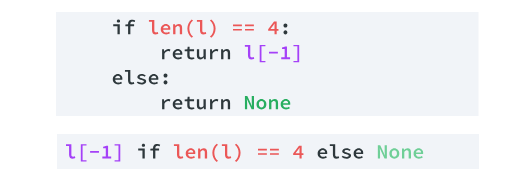

Let's finish by creating a lambda function version of this function and using apply to extract the tags.

In [104]:
tags.apply(lambda x: x[-1] if len(x) == 4 else np.nan).value_counts(dropna=False)

tags
NaN        33459
ask_hn      1348
show_hn      999
Name: count, dtype: int64

Congratulations, you've reached the end of the lesson! Let's quickly recap the techniques we learned:

- How to read and work with JSON data.
- How to use list comprehensions to extract specific values from JSON objects
- Some of the theory behind passing functions as arguments.
- How to create single-use lambda functions.
- How to use lambda functions in pandas to extract tags from Hacker News stories.

A lot of these techniques allow us to take code that was three to four lines long and write it in a single line of code. This is a really neat trick, and it can be tempting to start trying to write your code in as few lines as possible.

While this can be fun, it's useful to keep in mind you should always balance brevity with readability. When you write code, one of your highest priorities should be to make it readable. The importance of making your code accessible to others shouldn't be underrated; the person reading your code might be a colleague you're collaborating with, a potential employer looking at your portfolio, or yourself in six months when you have forgotten the details of why you wrote what.

In some cases, employing the techniques you will learn in this lesson will make your code more readable, but using them for more complex scenarios can have the opposite effect. Try to keep this in mind as you continue to work through lessons and when employing these techniques outside of this lesson

In the final lesson of the course, we'll learn techniques to fill missing values in data.


